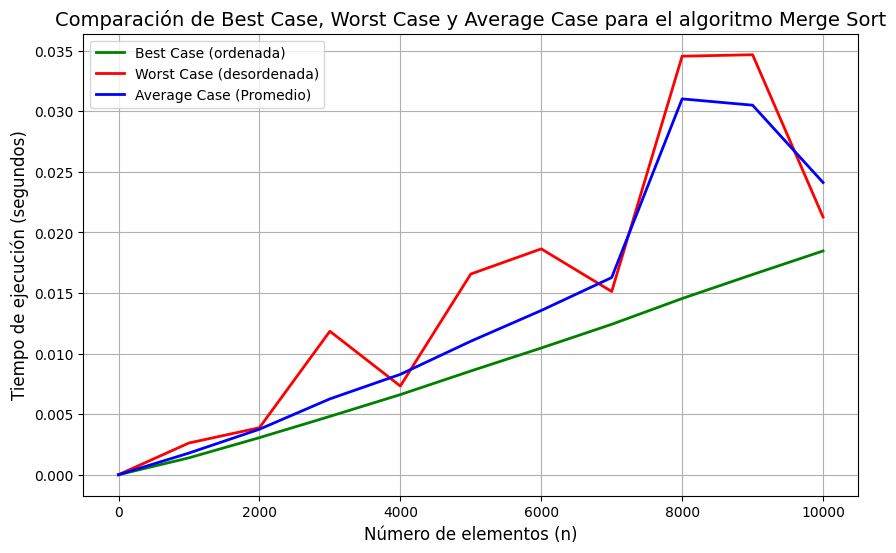

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
import random

# Función de ordenamiento por Merge Sort
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]

        merge_sort(left)
        merge_sort(right)

        i = j = k = 0

        while i < len(left) and j < len(right):
            if left[i] <= right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1

        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            arr[k] = right[j]
            j += 1
            k += 1

# Función para medir el tiempo de ejecución de un ordenamiento
def medir_tiempo(lista):
    start_time = time.time()
    merge_sort(lista)
    end_time = time.time()
    return end_time - start_time

# Generar una lista de números del 0 al 10,000 en incrementos de 1000
n_values = np.arange(0, 10001, 1000)

# Listas para almacenar los tiempos de ejecución de los casos
best_case_times = []
worst_case_times = []
average_case_times = []

# Parámetros para las pruebas
num_pruebas = 20

# Medir tiempo de ejecución en el mejor, peor y caso promedio
for n in n_values:
    tiempos_mejor_local = []
    tiempos_peor_local = []
    tiempos_promedio_local = []

    for _ in range(num_pruebas):
        # Mejor caso: lista ordenada
        best_case = list(range(n))
        tiempos_mejor_local.append(medir_tiempo(best_case))

        # Peor caso: lista invertida
        worst_case = list(range(n, 0, -1))
        tiempos_peor_local.append(medir_tiempo(worst_case))

        # Caso promedio: lista aleatoria
        average_case = random.sample(range(n), n)
        tiempos_promedio_local.append(medir_tiempo(average_case))

    # Almacenar los tiempos promediados de cada caso
    best_case_times.append(min(tiempos_mejor_local))  # Tomamos el mínimo para el best case
    worst_case_times.append(max(tiempos_peor_local))  # Tomamos el máximo para el worst case
    average_case_times.append(sum(tiempos_promedio_local) / len(tiempos_promedio_local))  # Promediamos el tiempo del average case

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(n_values, best_case_times, label='Best Case (ordenada)', color='green', linestyle='-', linewidth=2)
plt.plot(n_values, worst_case_times, label='Worst Case (desordenada)', color='red', linestyle='-', linewidth=2)
plt.plot(n_values, average_case_times, label='Average Case (Promedio)', color='blue', linestyle='-', linewidth=2)

# Etiquetas y título
plt.xlabel('Número de elementos (n)', fontsize=12)
plt.ylabel('Tiempo de ejecución (segundos)', fontsize=12)
plt.title('Comparación de Best Case, Worst Case y Average Case para el algoritmo Merge Sort', fontsize=14)
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()